In [2]:
#Import dependencies
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
%matplotlib inline
import datetime as dt

In [3]:
#Pull raw data from the csv file, and format the dataframe

df = pd.read_csv("Resources/Data for Housing price index.csv")
df = df.rename(columns={"REF_DATE":"Quarter","GEO":"City","VALUE":"Price Index"})
df = df[["Quarter","City","Price Index"]]
df['Quarter_dt']=pd.to_datetime(df['Quarter'], format='%Y-%m')
df["month"]=df["Quarter_dt"].dt.month
df['quarter']=df.apply(lambda row: (row.month-1)//3+1, axis=1)
df["year"]=df["Quarter_dt"].dt.year
df.sort_values(['year', 'month'], inplace=True)
df['quarter']=df['quarter'].astype(str)
df['year']=df['year'].astype(str)
df['period'] = df[['year', 'quarter']].apply(lambda x: '-Q'.join(x), axis=1)

#Generate the final df that used for analysis

final_df = df[["period","City","Price Index"]]
final_df = final_df.rename(columns={"period":"Quarter"})
final_df.head()

,Quarter,City,Price Index
0,2019-Q3,Six census metropolitan area composite,104.2
5,2019-Q3,"Montréal, Quebec",111.8
10,2019-Q3,"Ottawa-Gatineau, Ontario part, Ontario/Quebec",115.7
15,2019-Q3,"Toronto, Ontario",104.7
20,2019-Q3,"Calgary, Alberta",96.3


In [4]:
#create a separate dataframe for each city or region.
total_df = final_df.loc[final_df["City"]=="Six census metropolitan area composite"].reset_index(drop=True)
toronto_df =final_df.loc[final_df["City"] == "Toronto, Ontario"].reset_index(drop=True)
montreal_df =final_df.loc[final_df["City"] == "Montréal, Quebec"].reset_index(drop=True)
ottawa_df =final_df.loc[final_df["City"] == "Ottawa-Gatineau, Ontario part, Ontario/Quebec"].reset_index(drop=True)
calgary_df =final_df.loc[final_df["City"] == "Calgary, Alberta"].reset_index(drop=True)
van_df =final_df.loc[final_df["City"] == "Vancouver, British Columbia"].reset_index(drop=True)
victoria_df =final_df.loc[final_df["City"] == "Victoria, British Columbia"].reset_index(drop=True)

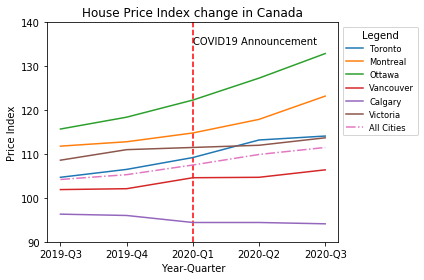

In [5]:
#Plot 6 cities data and national data into line graph
plt.plot(toronto_df["Quarter"],toronto_df["Price Index"],label="Toronto")
plt.plot(montreal_df["Quarter"],montreal_df["Price Index"],label="Montreal")
plt.plot(ottawa_df["Quarter"],ottawa_df["Price Index"],label="Ottawa")
plt.plot(van_df["Quarter"],van_df["Price Index"],label="Vancouver")
plt.plot(calgary_df["Quarter"],calgary_df["Price Index"],label="Calgary")
plt.plot(victoria_df["Quarter"],victoria_df["Price Index"],label="Victoria")
final_graph= plt.plot(total_df["Quarter"],total_df["Price Index"],label="All Cities",linestyle="dashdot")

#format the graph, add v-lines and legend
plt.ylim(90,140)
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')
plt.legend(title='Legend', bbox_to_anchor=(1, 1), loc='upper left', prop=fontP)
plt.vlines("2020-Q1", 90, 140, colors='r', linestyles='dashed', data=None)
plt.text("2020-Q1",135,'COVID19 Announcement')
plt.xlabel("Year-Quarter")
plt.ylabel("Price Index")
plt.title("House Price Index change in Canada")
plt.tight_layout()
plt.savefig("Output/Covid19 impact on house PI.png")
plt.show()


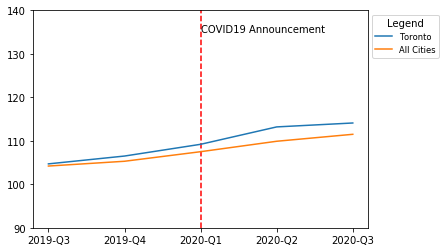

In [6]:
#Compare Toronto House price index with All citites 
plt.plot(toronto_df["Quarter"],toronto_df["Price Index"],label="Toronto")
final_graph= plt.plot(total_df["Quarter"],total_df["Price Index"],label="All Cities")
plt.ylim(90,140)
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')
plt.legend(title='Legend', bbox_to_anchor=(1, 1), loc='upper left', prop=fontP)
plt.vlines("2020-Q1", 90, 140, colors='r', linestyles='dashed', label="COVID19 Announcement", data=None)
plt.text("2020-Q1",135,'COVID19 Announcement')
plt.show()